In [1]:
import os           
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# 현재경로 확인
os.getcwd()

'C:\\Users\\jinh2\\DFS\\캡스톤'

In [3]:
# 전처리 함수
def div_ins(data) :   # data <- .csv 파일
    data_arr = data.to_numpy()
    data_arr2 = data_arr[:,0:30]#100]
    data_arri = data_arr[:, 30]#100]
    data_div = data_arr2/data_arri[:,None]
    data_arrc = data_arr[:, 31]#100]
    data_arrc = data_arrc.reshape(-1,1)
    data = np.concatenate((data_div, data_arrc), axis=1)
    data = pd.DataFrame(data, columns = ['x1','x2','x3','x4', 'x5', \
                                         'x6','x7','x8','x9', 'x10', \
                                         'x11','x12','x13','x14', 'x15', \
                                         'x16','x17','x18','x19', 'x20', \
                                         'x21','x22','x23','x24', 'x25', \
                                         'x26','x27','x28','x29', 'x30', \
                                        # 'x31','x32','x33','x34', 'x35', \
                                        # 'x36','x37','x38','x39', 'x40', \
                                        # 'x41','x42','x43','x44', 'x45', \
                                        # 'x46','x47','x48','x49', 'x50', \
                                        # 'x51','x52','x53','x54', 'x55', \
                                        # 'x56','x57','x58','x59', 'x60', \
                                        # 'x61','x62','x63','x64', 'x65', \
                                        # 'x66','x67','x68','x69', 'x70', \
                                        # 'x71','x72','x73','x74', 'x75', \
                                        # 'x76','x77','x78','x79', 'x80', \
                                        # 'x81','x82','x83','x84', 'x85', \
                                        # 'x86','x87','x88','x89', 'x90', \
                                        # 'x91','x92','x93','x94', 'x95', \
                                        # 'x96','x97','x98','x99', 'x100', \
                                         'class'])
    return data

In [4]:
# 데이터 불러오기
data = pd.read_csv("./data/data_set_4.csv") 
data2 = pd.read_csv("./data/data_set_2.csv") 
data3 = pd.read_csv("./data/data_set_8.csv") 
data4 = pd.read_csv("./data/data_set_16.csv") 
#print(data)
# 전처리
data = div_ins(data)
data2 = div_ins(data2)
data3 = div_ins(data3)
data4 = div_ins(data4)

data = pd.concat([data,data2])
data = pd.concat([data,data3])
data = pd.concat([data,data4])

In [5]:
nCar = data.shape[0] # 데이터 개수
nVar = data.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 72 nVar: 31


In [6]:
# 피쳐 추출
feature_columns = list(data.columns.difference(['class']))
X = data[feature_columns]  # 독립변수
y = data['class']          # 종속변수
y

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
13    1.0
14    2.0
15    2.0
16    2.0
17    2.0
Name: class, Length: 72, dtype: float64

In [7]:
from sklearn import tree
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'
from sklearn.tree import export_graphviz
from graphviz import Source

In [8]:
target_names = np.array(['GOOD', 'BAD_FS', 'BAD_MA']) # == [0, 1, 2]

In [9]:
clf = tree.DecisionTreeClassifier(max_depth=2)
#clf = clf.fit(train_x, train_y)|
clf = clf.fit(X, y)

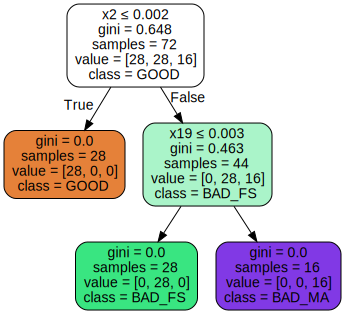

In [10]:
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=feature_columns,
                               class_names=target_names,
                               filled=True, rounded=True,
                               special_characters=True)
graph = Source(dot_data)
graph